# 三維平面繪製
繪製一個三維空間

In [1]:
%run ./function.ipynb

In [2]:
from mpl_toolkits import mplot3d
import warnings # to supress the furturewarning
warnings.simplefilter(action='ignPATH = 'D:/Temp/NCTU/crystal/第二階段/new_alert/日數分類_營業日/'
FILE = 'TWN_A11_01_day15_with_aggregated_txn_scenario_txn_type_key_營業日.csv'
df = pd.read_csv(PATH + FILE)
df.columnsore', category=FutureWarning)

In [3]:
PATH = 'D:/Temp/NCTU/crystal/第二階段/new_alert/日數分類_營業日/'
FILE = 'TWN_A11_01_day15_with_aggregated_txn_scenario_txn_type_key_營業日.csv'
df = pd.read_csv(PATH + FILE)
df.columns

Index(['alert_id', 'run_date', 'primary_entity_level_code',
       'primary_entity_number', 'scenario_name', 'TO_SAR', 'Acct_No',
       'Cust_No', 'Cust_Key', 'Cust_Segmentation', 'Cust_Typ_Cd', 'Cust_Id_Id',
       'Cust_Id_Typ_Desc', 'Cust_Id_State_Cd', 'Cust_Dt_Of_Birth',
       'Cust_Sts_Desc', 'Street_Postal_Cd', 'Street_Cntry_Cd',
       'Mailing_Postal_Cd', 'Mailing_Cntry_Cd', 'Residence_Cntry_Cd',
       'Citizenship_Cntry_Cd', 'Org_Cntry_Of_Buz_Cd', 'Empl_No', 'Ocup_Code',
       'job_title_code', 'Lst_Cont_Dt', 'Politically_Exposed_Pers_Ind',
       'Non_Prft_Org_Ind', 'Cust_Since_Dt', 'Lst_Susp_Actv_Rpt_Dt',
       'Extnl_Cust_Ind', 'Negative_News_Ind', 'Prim_Br_No', 'Obu_Ind',
       'Riskclass_Cd', 'risk_score', 'last_risk_assessment_date',
       'change_current_ind', 'change_begin_date', 'change_end_date',
       'Credit_Amt', 'number_of_Credit', 'Debit_Amt', 'number_of_Debit'],
      dtype='object')

In [5]:
df['TO_SAR'] = df['TO_SAR'].replace(np.nan, 0)
df['TO_SAR'] = df['TO_SAR'].replace('F', 1)
df['TO_SAR'] = df['TO_SAR'].replace('NF', 1)

In [6]:
SAR_type = 'TO_SAR'
train_set, test_set = ReadFile(df, SAR_type)

Verify on time series
shape of data: (86770, 39)
total number of TO_SAR: 446
********************************
time interval in train set:2019-03-04~2020-04-29
TO_SAR in train set: 267
TO_SAR/Total in train set 0.005128599143312653
split dataset to train, test...
********************************
time interval in test set:2020-02-19~2020-12-31
TO_SAR in test set: 179
TO_SAR/Total in test set 0.0051571638479933155
********************************
train data shape:  (52061, 38)
test data shape:  (34709, 38)


In [51]:
SAR = train_set[train_set.TO_SAR!= 0]
Non_SAR = train_set[train_set.TO_SAR== 0]

In [52]:
credit_amt_median = SplitMedian(train_set, 'Credit_Amt')
number_amt_median = SplitMedian(train_set, 'number_of_Credit')

len of median: 17787
len of median: 218


In [53]:
credit_amt_median = np.percentile(credit_amt_median, np.linspace(10, 100, 50))
number_of_credit_median = np.percentile(number_amt_median, np.linspace(10, 100, 50))

In [54]:
ent = pd.DataFrame(columns = ['credit_amt_median', 'number_of_credit_median', 'father_entropy', 'condition_entropy0', 'condition_entropy1', 'information_gain'])
father_entropy = Entropy(train_set, 'TO_SAR')
total_cnt = train_set.shape[0]
for i in range(len(credit_amt_median)):
    for j in range(len(number_of_credit_median)):
        thre1 = credit_amt_median[i]
        thre2 = number_of_credit_median[j]
        
        idx1 = set(train_set[train_set['Credit_Amt'] >= thre1].index)
        idx2 = set(train_set[train_set['number_of_Credit'] >= thre2].index)
        
        idx = list(idx1 & idx2)
        new_sam_1 = train_set.iloc[idx]
        new_sam_0 = train_set.drop(index= new_sam_1.index)
        
#        print(f'new_sam_1: {len(new_sam_1)}, new_sam_0: {len(new_sam_0)}')
#        if len(new_sam_1)== 0 or len(new_sam_0)== 0:
#            continue
                 
        condition_entropy_0 = Entropy(new_sam_0, 'TO_SAR') * (len(new_sam_0) / total_cnt)
        condition_entropy_1 = Entropy(new_sam_1, 'TO_SAR') * (len(new_sam_1) / total_cnt)
        information_gain = father_entropy - (condition_entropy_0 + condition_entropy_1)
        
        ent = ent.append({'credit_amt_median': thre1, 'number_of_credit_median': thre2,'father_entropy': father_entropy, 'condition_entropy0': condition_entropy_0, 'condition_entropy1': condition_entropy_1, 'information_gain': information_gain}, ignore_index= True)
        

In [55]:
x = ent.loc[:, 'credit_amt_median'].to_numpy()
y = ent.loc[:, 'number_of_credit_median'].to_numpy()
x, y = np.meshgrid(x, y)
z = np.empty([len(x), len(y)])
for i in range(len(x)):
    for j in range(len(y)):
        z[i][j] = ent[(ent['credit_amt_median'] == x[i][j]) & (ent['number_of_credit_median'] == y[i][j])]['information_gain']

In [56]:
print(x.shape, y.shape, z.shape)

(2500, 2500) (2500, 2500) (2500, 2500)


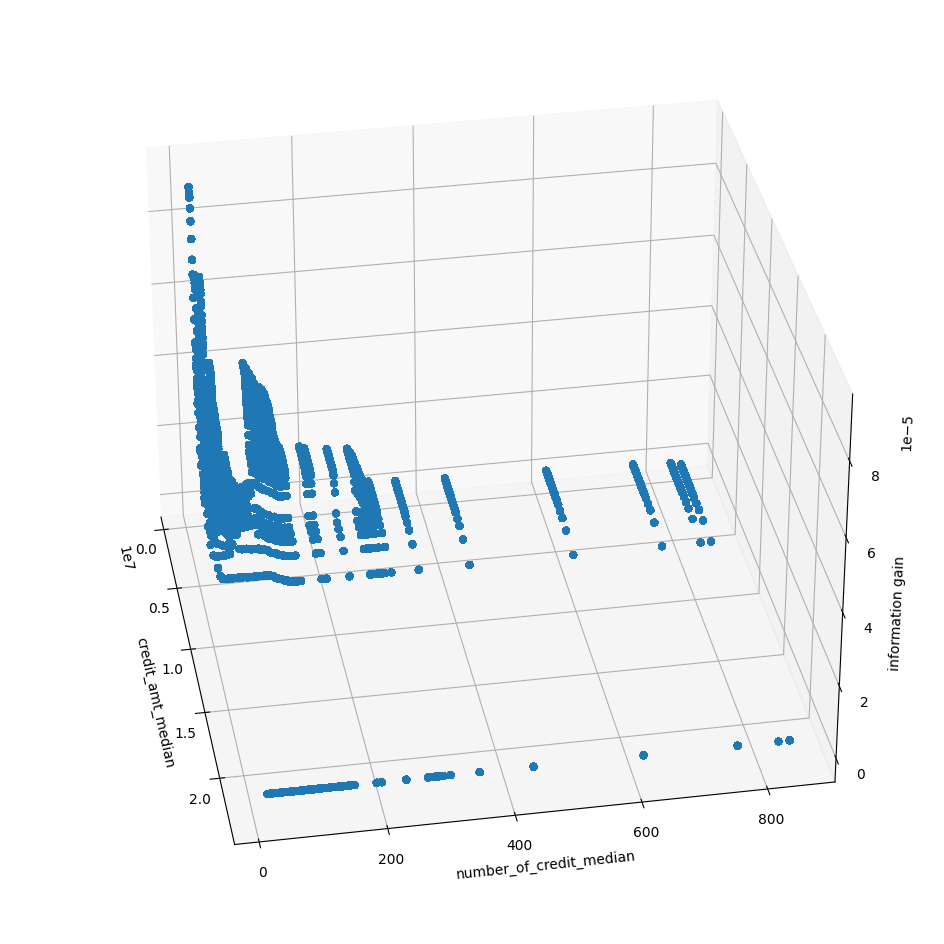

In [58]:
fig = plt.figure(figsize= (12, 12))
ax3d = plt.axes(projection= '3d')
ax3d.view_init(32, -10)
ax3d.scatter(x, y, z)
ax3d.set_xlabel('credit_amt_median')
ax3d.set_ylabel('number_of_credit_median')
ax3d.set_zlabel('information gain')
plt.savefig('D:/Temp/NCTU/mark/Parametric_Plain_credit.png')
plt.show()

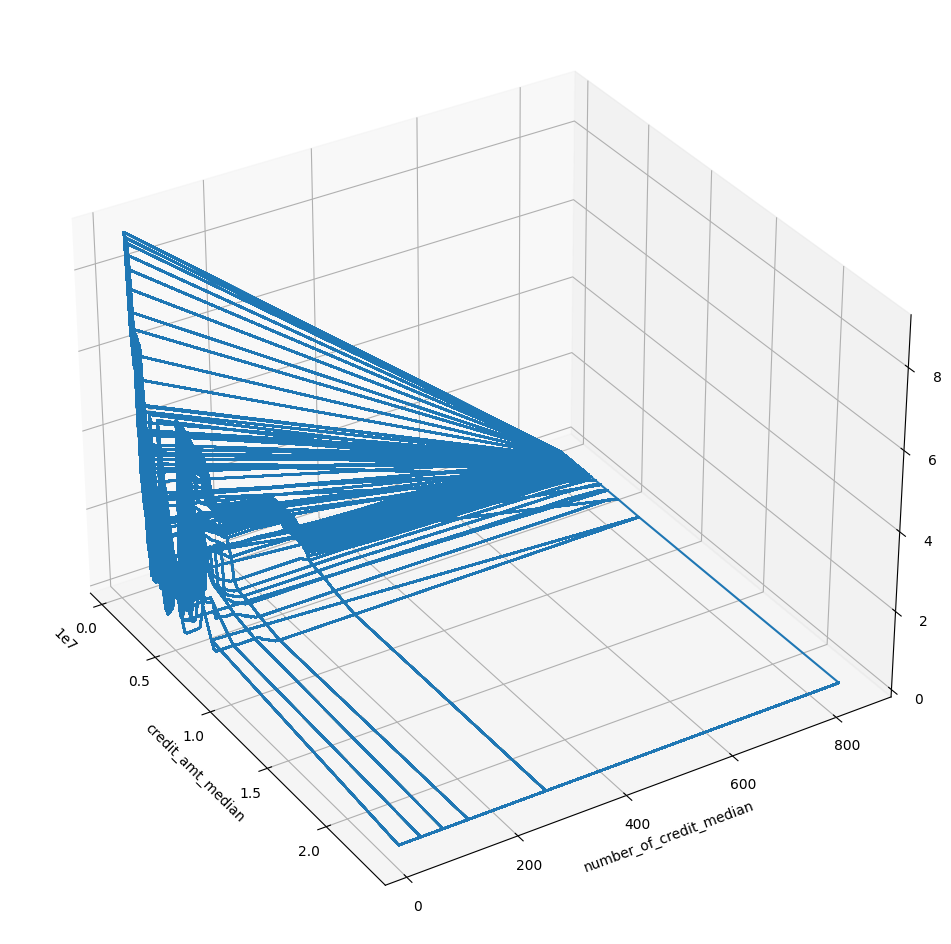

In [15]:
fig = plt.figure(figsize= (12, 12))
ax3d = plt.axes(projection= '3d')
ax3d.view_init(32, -32)
ax3d.plot_wireframe(x, y, z, rstride= 10, cstride= 10)
ax3d.set_xlabel('credit_amt_median')
ax3d.set_ylabel('number_of_credit_median')
ax3d.set_zlabel('information gain')
plt.show()

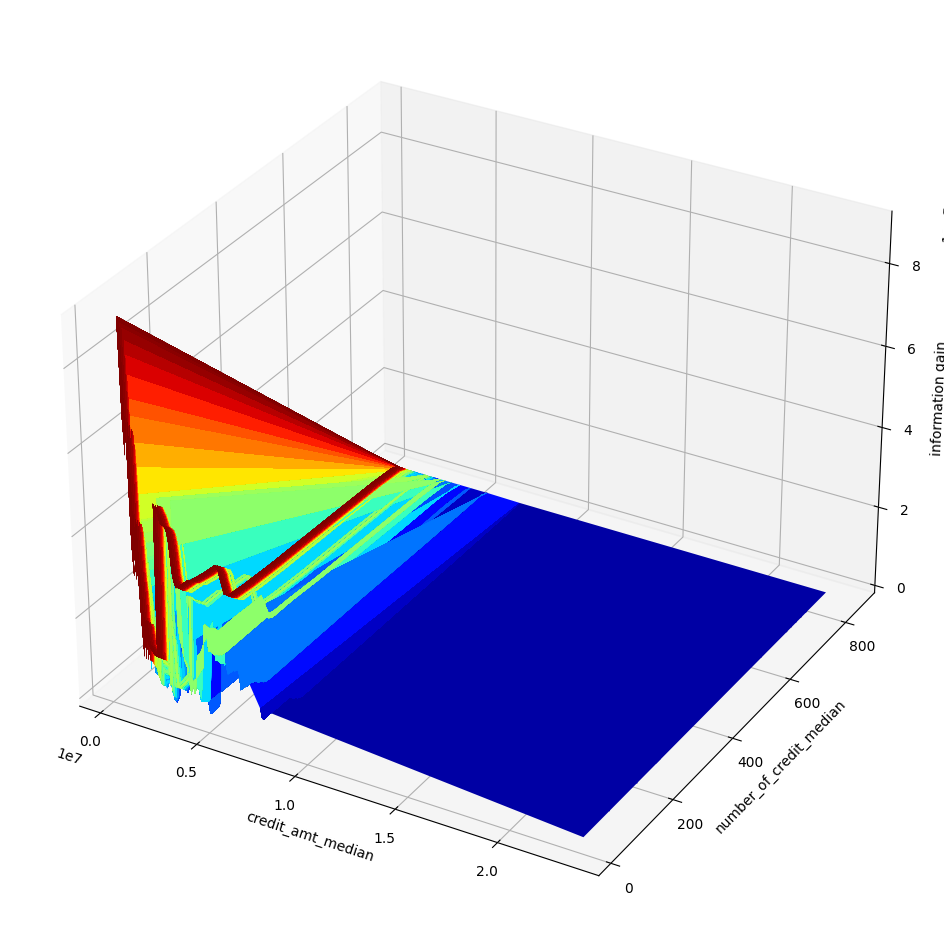

In [16]:
fig = plt.figure(figsize= (12, 12))
ax3d = plt.axes(projection= '3d')
#ax3d.view_init(32, -32)
#ax3d.plot_wireframe(x, y, z, rcount= 15, ccount= 15, color= 'red')
ax3d.plot_surface(x, y, z, cmap= 'jet')
ax3d.set_xlabel('credit_amt_median')
ax3d.set_ylabel('number_of_credit_median')
ax3d.set_zlabel('information gain')
plt.show()

In [35]:
debit_amt_median = SplitMedian(train_set, 'Debit_Amt')
number_amt_debit_median = SplitMedian(train_set, 'number_of_Debit')

debit_amt_median = np.percentile(debit_amt_median, np.linspace(10, 100, 50))
number_amt_debit_median = np.percentile(number_amt_debit_median, np.linspace(10, 100, 50))

len of median: 14527
len of median: 154


In [36]:
ent = pd.DataFrame(columns = ['debit_amt_median', 'number_of_debit_median', 'father_entropy', 'condition_entropy0', 'condition_entropy1', 'information_gain'])
father_entropy = Entropy(train_set, 'TO_SAR')
total_cnt = train_set.shape[0]
for i in range(len(debit_amt_median)):
    for j in range(len(number_amt_debit_median)):
        thre1 = debit_amt_median[i]
        thre2 = number_amt_debit_median[j]
        
        idx1 = set(train_set[train_set['Debit_Amt'] >= thre1].index)
        idx2 = set(train_set[train_set['number_of_Debit'] >= thre2].index)
        
        idx = list(idx1 & idx2)
        new_sam_1 = train_set.iloc[idx]
        new_sam_0 = train_set.drop(index= new_sam_1.index)
        
        #print(f'new_sam_1: {len(new_sam_1)}, new_sam_0: {len(new_sam_0)}')
#         if len(new_sam_1)== 0 or len(new_sam_0)== 0:
#             continue
                 
        condition_entropy_0 = Entropy(new_sam_0, 'TO_SAR') * (len(new_sam_0) / total_cnt)
        condition_entropy_1 = Entropy(new_sam_1, 'TO_SAR') * (len(new_sam_1) / total_cnt)
        information_gain = father_entropy - (condition_entropy_0 + condition_entropy_1)
        
        ent = ent.append({'debit_amt_median': thre1, 'number_of_debit_median': thre2,'father_entropy': father_entropy, 'condition_entropy0': condition_entropy_0, 'condition_entropy1': condition_entropy_1, 'information_gain': information_gain}, ignore_index= True)
        

In [37]:
x = ent.loc[:, 'debit_amt_median'].to_numpy()
y = ent.loc[:, 'number_of_debit_median'].to_numpy()
x, y = np.meshgrid(x, y)
z = np.empty([len(x), len(y)])
for i in range(len(x)):
    for j in range(len(y)):
        z[i][j] = ent[(ent['debit_amt_median'] == x[i][j]) & (ent['number_of_debit_median'] == y[i][j])]['information_gain']

In [38]:
print(x.shape, y.shape, z.shape)

(2500, 2500) (2500, 2500) (2500, 2500)


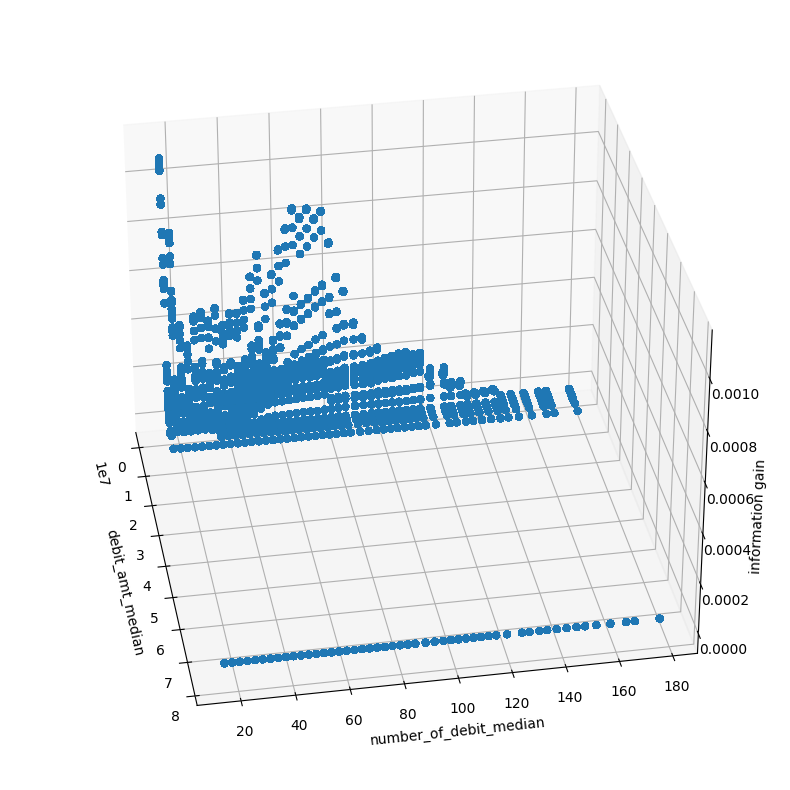

In [46]:
fig = plt.figure(figsize= (10, 10))
ax3d = plt.axes(projection= '3d')
ax3d.view_init(32, -10)
ax3d.scatter(x, y, z)
ax3d.set_xlabel('debit_amt_median')
ax3d.set_ylabel('number_of_debit_median')
ax3d.set_zlabel('information gain')
plt.savefig('../Parametric Plain_credit.png')
plt.show()

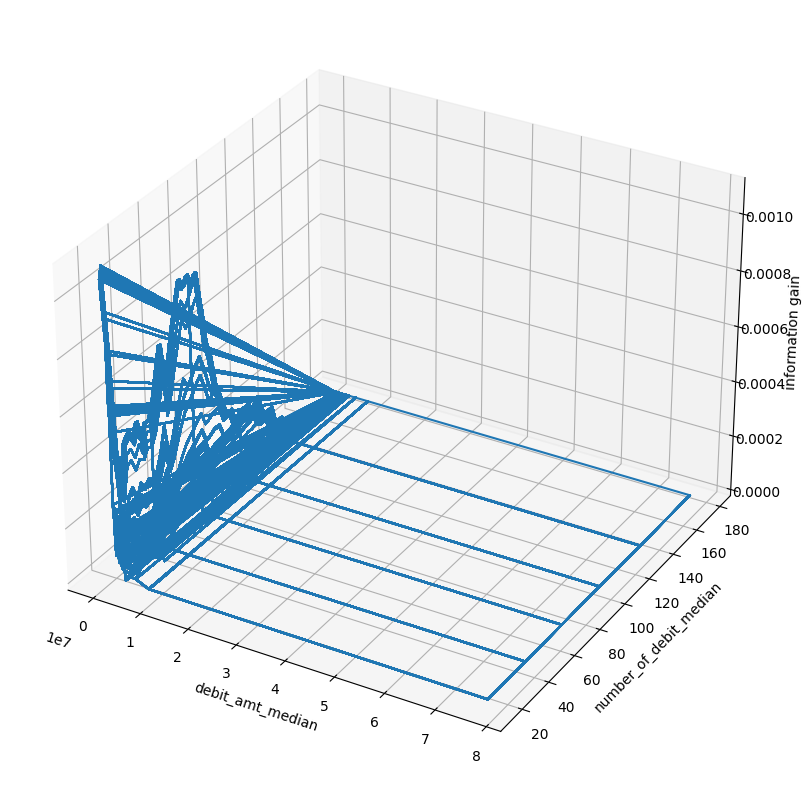

In [44]:
fig = plt.figure(figsize= (10, 10))
ax3d = plt.axes(projection= '3d')
ax3d.plot_wireframe(x, y, z, rstride= 10, cstride= 10)
ax3d.set_xlabel('debit_amt_median')
ax3d.set_ylabel('number_of_debit_median')
ax3d.set_zlabel('information gain')
plt.show()

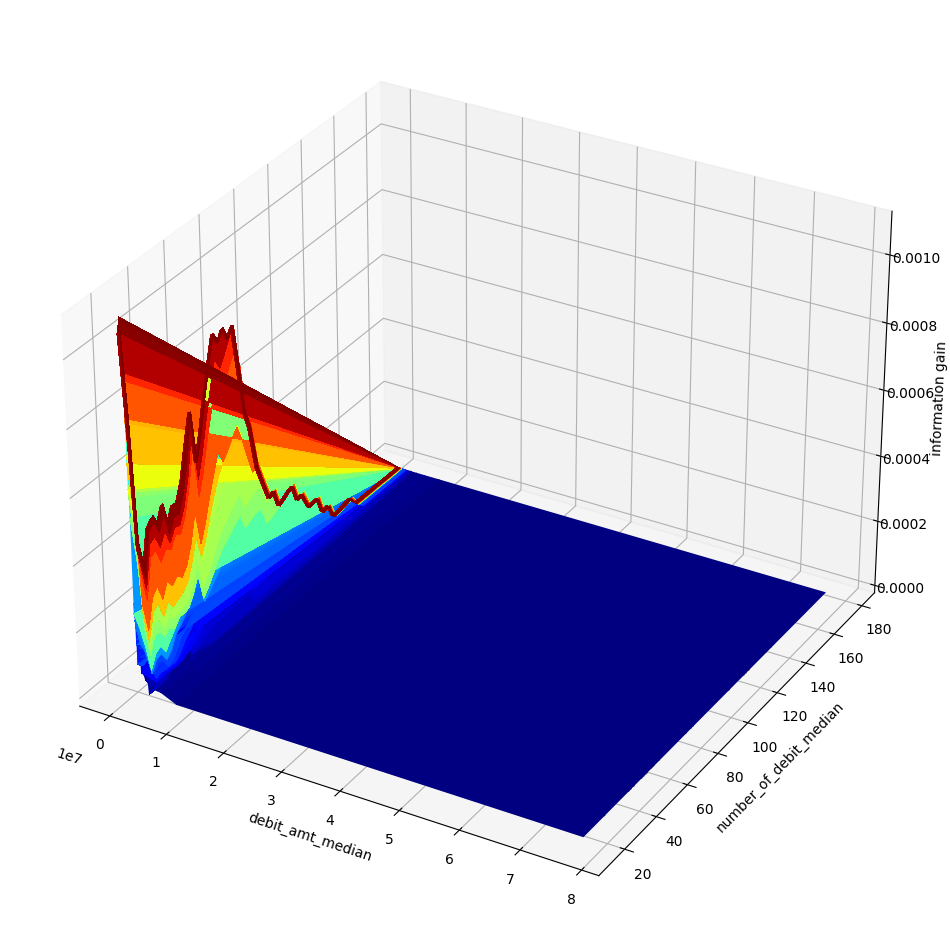

In [43]:
fig = plt.figure(figsize= (12, 12))
ax3d = plt.axes(projection= '3d')
#ax3d.view_init(32, -32) # 控制視角
ax3d.plot_surface(x, y, z, cmap= 'jet')
ax3d.set_xlabel('debit_amt_median')
ax3d.set_ylabel('number_of_debit_median')
ax3d.set_zlabel('information gain')
plt.show()